# Final Project - Tweets Classification

### Imports

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d munkialbright/classified-tweets
! kaggle datasets download -d prakash99/cybertweets
! kaggle datasets download -d nikhileswarkomati/suicide-watch
! kaggle datasets download -d rajnikant2020/tweeter-hate-speech-sentiment-analysis
! kaggle datasets download -d raghadabdullah/racism-tweets
! kaggle datasets download -d eldrich/hate-speech-offensive-tweets-by-davidson-et-al

  0% 0.00/772k [00:00<?, ?B/s]
100% 772k/772k [00:00<00:00, 102MB/s]
  0% 0.00/2.82M [00:00<?, ?B/s]
100% 2.82M/2.82M [00:00<00:00, 187MB/s]
100% 60.6M/60.6M [00:00<00:00, 93.7MB/s]
100% 60.6M/60.6M [00:00<00:00, 85.8MB/s]
  0% 0.00/1.89M [00:00<?, ?B/s]
100% 1.89M/1.89M [00:00<00:00, 57.4MB/s]
  0% 0.00/634k [00:00<?, ?B/s]
100% 634k/634k [00:00<00:00, 52.0MB/s]
  0% 0.00/2.10M [00:00<?, ?B/s]
100% 2.10M/2.10M [00:00<00:00, 45.0MB/s]


In [ ]:
! unzip /content/classified-tweets.zip -d /content/data
! unzip /content/cybertweets.zip -d /content/data
! unzip /content/racism-tweets.zip -d /content/data
! unzip /content/suicide-watch.zip -d /content/data
! unzip /content/tweeter-hate-speech-sentiment-analysis.zip -d /content/data
! unzip /content/twitter-sentiment-analysis-hatred-speech.zip -d /content/data
! unzip /content/hate-speech-offensive-tweets-by-davidson-et-al.zip

Archive:  /content/classified-tweets.zip
  inflating: /content/data/classified_tweets.csv  
Archive:  /content/cybertweets.zip
  inflating: /content/data/cyberbullying_tweets.csv  
Archive:  /content/racism-tweets.zip
  inflating: /content/data/twitter_racism_parsed_dataset.csv  
Archive:  /content/suicide-watch.zip
  inflating: /content/data/Suicide_Detection.csv  
Archive:  /content/tweeter-hate-speech-sentiment-analysis.zip
  inflating: /content/data/test_tweets.csv  
  inflating: /content/data/train_tweets.csv  
unzip:  cannot find or open /content/twitter-sentiment-analysis-hatred-speech.zip, /content/twitter-sentiment-analysis-hatred-speech.zip.zip or /content/twitter-sentiment-analysis-hatred-speech.zip.ZIP.
Archive:  /content/hate-speech-offensive-tweets-by-davidson-et-al.zip
  inflating: LICENSE                 
  inflating: README.md               
  inflating: data/labeled_data.csv   
  inflating: data/labeled_data.p     
  inflating: data/readme.md          


In [ ]:
! rm /content/classified-tweets.zip
! rm /content/cybertweets.zip
! rm /content/racism-tweets.zip
! rm /content/suicide-watch.zip
! rm /content/tweeter-hate-speech-sentiment-analysis.zip
! rm /content/hate-speech-offensive-tweets-by-davidson-et-al.zip
! rm /content/LICENSE
! rm /content/README.md

In [ ]:
df_suicide = pd.read_csv('/content/data/Suicide_Detection.csv', index_col=[0])
df_cbull = pd.read_csv('/content/data/cyberbullying_tweets.csv')
df_hate1 = pd.read_csv('/content/data/train_tweets.csv')
df_hate2 = pd.read_csv('/content/data/labeled_data.csv', index_col=[0])
df_racism = pd.read_csv('/content/data/twitter_racism_parsed_dataset.csv')

### Data Cleansing & Encoding

**Cleaning**

In [ ]:
df_hate1.drop('id', axis=1, inplace=True)

# Class column is the label (0 or 1 == 'Hate Speech', 2 == 'Normal').
df_hate2.drop(['count','hate_speech','offensive_language', 'neither'], axis=1, inplace=True)
df_hate2.loc[df_hate2['class'] == 0, 'class'] = 1
df_hate2 = df_hate2[df_hate2['class'] == 1]
df_hate2.reset_index(drop=True, inplace=True)

df_racism.drop(['index', 'id', 'Annotation'], axis=1, inplace=True)

In [ ]:
print(df_suicide.shape, df_cbull.shape, df_hate1.shape, df_hate2.shape, df_racism.shape)

(232074, 2) (47692, 2) (31962, 2) (20620, 2) (13471, 2)


**Encoding**

In [ ]:
def binary_encode(df, col, not_val):
  df.loc[df[col] == not_val, col] = 0
  df.loc[df[col] != 0, col] = 1

binary_encode(df_cbull, 'cyberbullying_type', 'not_cyberbullying')
binary_encode(df_suicide, 'class', 'non-suicide')

**Change to train style**

In [ ]:
def convert_to_train_style(df, label):
  df[['cyberbullying', 'hate', 'suicidal']] = 0
  df.rename({label: 'tweet'}, axis=1, inplace=True)
  return df

df_suicide = convert_to_train_style(df_suicide, 'text')
df_cbull = convert_to_train_style(df_cbull, 'tweet_text')
df_hate1 = convert_to_train_style(df_hate1, 'tweet')
df_hate2 = convert_to_train_style(df_hate2, 'tweet')
df_racism = convert_to_train_style(df_racism, 'Text')

In [ ]:
def convert_labels(df, label, title):
  df.loc[df[label] == 1, title] = 1
  df.drop(label, axis=1, inplace=True)
  
convert_labels(df_suicide, 'class', 'suicidal')
convert_labels(df_cbull, 'cyberbullying_type', 'cyberbullying')
convert_labels(df_hate1, 'label', 'hate')
convert_labels(df_hate2, 'class', 'hate')
convert_labels(df_racism, 'oh_label', 'hate')

**Combine datasets to a single dataset**

In [ ]:
train = pd.concat([df_suicide, df_cbull, df_hate1, df_hate2, df_racism], axis=0)
train.reset_index(drop=True, inplace=True)

**Transforming dataframe to be on the form of 'tweet'-'type'-'type-name':**

In [ ]:
def transform_label(df):
  df['type_id'] = 0
  df['type-name'] = "Normal tweet"
  df.loc[df['cyberbullying'] == 1, 'type_id'] = 1
  df.loc[df['cyberbullying'] == 1, 'type-name'] = 'cyberbullying'
  df.loc[df['hate'] == 1, 'type_id'] = 2
  df.loc[df['hate'] == 1, 'type-name'] = 'hate'
  df.loc[df['suicidal'] == 1, 'type_id'] = 3
  df.loc[df['suicidal'] == 1, 'type-name'] = 'suicidal'
  df.drop(['cyberbullying', 'hate', 'suicidal'], axis=1, inplace=True)
  return df

train = transform_label(train)

train.shape

(345819, 3)

In [ ]:
normal_tweets = train[train['type-name'] == 'Normal tweet']
sui_tweets = train[train['type-name'] == 'suicidal']
cb_tweets = train[train['type-name'] == 'cyberbullying']
hate_tweets = train[train['type-name'] == 'hate']

In [ ]:
print(len(normal_tweets))
print(len(sui_tweets))
print(len(cb_tweets))
print(len(hate_tweets))

165203
116037
39747
24832


**Fixing Imbalanced Data:**

We would like our model to be the as most objective as possible, therefore we'll make the dataset balanced.  
We'll do it by substruct each label to be 24832 (which is the number of 'hate' tweets).

In [ ]:
min_tweets = len(hate_tweets)
# min_tweets = 5000

In [ ]:
train = pd.concat([normal_tweets[:min_tweets], sui_tweets[:min_tweets],
                   cb_tweets[:min_tweets], hate_tweets[:min_tweets]], axis=0)
train.reset_index(drop=True, inplace=True)

In [ ]:
normal_tweets = train[train['type-name'] == 'Normal tweet']
sui_tweets = train[train['type-name'] == 'suicidal']
cb_tweets = train[train['type-name'] == 'cyberbullying']
hate_tweets = train[train['type-name'] == 'hate']

In [ ]:
print(len(normal_tweets))
print(len(sui_tweets))
print(len(cb_tweets))
print(len(hate_tweets))

24832
24832
24832
24832


In [ ]:
train.shape

(99328, 3)

In [ ]:
train[min_tweets*1:min_tweets*2].head(5)

,tweet,type_id,type-name
24832,Ex Wife Threatening SuicideRecently I left my ...,3,suicidal
24833,i need helpjust help me im crying so hard,3,suicidal
24834,"I’m so lostHello, my name is Adam (16) and I’v...",3,suicidal
24835,Honetly idkI dont know what im even doing here...,3,suicidal
24836,[Trigger warning] Excuse for self inflicted bu...,3,suicidal


In [ ]:
from io import StringIO
category_id_df = train[['type-name', 'type_id']].drop_duplicates().sort_values('type_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['type_id', 'type-name']].values)

### Word Embedding

Every step we'll show the changes, so this is the initial data:

In [ ]:
train['tweet'].head()

0    Am I weird I don't get affected by compliments...
1    Finally 2020 is almost over... So I can never ...
2    Everyone wants to be "edgy" and it's making me...
3    Fuck the verizon smart family app I can’t even...
4    Well, Im screwed. I locked myself in the schoo...
Name: tweet, dtype: object

**Convert to lower case**

In [ ]:
def lower_case(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    print(df['tweet'].head())
  
lower_case(train)

0    am i weird i don't get affected by compliments...
1    finally 2020 is almost over... so i can never ...
2    everyone wants to be "edgy" and it's making me...
3    fuck the verizon smart family app i can’t even...
4    well, im screwed. i locked myself in the schoo...
Name: tweet, dtype: object


**Punctuation Removal**

In [ ]:
def punctuation_removal(df):
    df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
    print(df['tweet'].head())

punctuation_removal(train)

0    am i weird i dont get affected by compliments ...
1    finally 2020 is almost over so i can never hea...
2    everyone wants to be edgy and its making me se...
3    fuck the verizon smart family app i cant even ...
4    well im screwed i locked myself in the school ...
Name: tweet, dtype: object


**Stop Words Removal**

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
def stop_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(df['tweet'].head())

stop_words_removal(train)

0    weird dont get affected compliments coming som...
1    finally 2020 almost never hear 2020 bad year e...
2    everyone wants edgy making self conscious feel...
3    fuck verizon smart family app cant even watch ...
4    well im screwed locked school toilet cant get ...
Name: tweet, dtype: object


**Frequent Words Removal**

In [ ]:
n_words_limit = 50
# n_words_limit = 10

In [ ]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:n_words_limit]
freq

im           76564
dont         49969
like         44106
want         32854
know         30048
feel         26487
life         26154
get          25987
ive          23697
cant         23289
people       22986
one          21052
even         20678
would        19550
time         19238
really       19003
think        17175
never        15555
go           15472
going        15100
day          13662
much         13452
friends      13431
filler       13411
help         12250
got          12084
make         11645
years        11543
fucking      11336
good         10993
school       10929
things       10889
see          10341
fuck         10275
someone      10238
way          10199
still        10181
anything     10108
could        10096
back          9827
need          9820
bitch         9694
right         9512
something     9344
love          9303
anymore       9245
didnt         9154
every         9118
better        9107
shit          9106
dtype: int64

In [ ]:
freq = list(freq.index)

In [ ]:
def frequent_words_removal(df):    
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    print(df['tweet'].head())

frequent_words_removal(train)

0    weird affected compliments coming irl internet...
1    finally 2020 almost hear 2020 bad year ever sw...
2    everyone wants edgy making self conscious stan...
3    verizon smart family app watch porn privately ...
4     well screwed locked toilet edit lived tell story
Name: tweet, dtype: object


**Rare Words Removal**

In [ ]:
n_words_limit = 20000
# n_words_limit = 10000

In [ ]:
rare = pd.Series(' '.join(train['tweet']).split()).value_counts()[-n_words_limit:]
rare

narcanned             1
bullcrappery          1
laughingeverything    1
knowmaybe             1
positiviti            1
                     ..
wss                   1
evilafter             1
becauseid             1
simlike               1
pcraigroberts         1
Length: 20000, dtype: int64

In [ ]:
rare = list(rare.index)

In [ ]:
def rare_words_removal(df):
    df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
    print(df['tweet'].head())

rare_words_removal(train)

0    weird affected compliments coming irl internet...
1    finally 2020 almost hear 2020 bad year ever sw...
2    everyone wants edgy making self conscious stan...
3    verizon smart family app watch porn privately ...
4     well screwed locked toilet edit lived tell story
Name: tweet, dtype: object


**Spelling Correction**

In [ ]:
# from textblob import TextBlob

In [ ]:
# def spell_correction(df):
#     df['tweet'] = df['tweet'].apply(lambda x: str(TextBlob(x).correct()))
#     print(df['tweet'].head())

In [ ]:
# spell_correction(train)

## Bag of Words

In [ ]:
train_copy = train.copy()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer(max_features=1000, ngram_range=(1,1),analyzer = "word")
X = c_vect.fit_transform(train_copy['tweet'])

A peek for our frequency of each term list:

In [ ]:
list(zip(c_vect.get_feature_names(), X.sum(0).getA1()))[:50]

[('10', 1647),
 ('100', 853),
 ('12', 913),
 ('13', 769),
 ('14', 794),
 ('15', 1184),
 ('16', 951),
 ('17', 789),
 ('18', 1034),
 ('19', 595),
 ('20', 1214),
 ('30', 802),
 ('able', 3674),
 ('absolutely', 1162),
 ('abuse', 1042),
 ('abused', 598),
 ('abusive', 831),
 ('accept', 711),
 ('account', 1037),
 ('act', 1172),
 ('acting', 528),
 ('actual', 618),
 ('actually', 4812),
 ('add', 568),
 ('advice', 1713),
 ('afford', 859),
 ('afraid', 1814),
 ('age', 1494),
 ('ago', 4700),
 ('aint', 1492),
 ('alcohol', 633),
 ('alive', 2310),
 ('allowed', 746),
 ('almost', 3413),
 ('alone', 4900),
 ('along', 875),
 ('already', 3700),
 ('also', 7064),
 ('although', 637),
 ('always', 9064),
 ('amazing', 945),
 ('amount', 888),
 ('amp', 3250),
 ('ampx200b', 1575),
 ('anger', 571),
 ('angry', 1342),
 ('annoying', 697),
 ('another', 4381),
 ('answer', 1012),
 ('anxiety', 2874)]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000, analyzer = 'word', ngram_range=(1, 2))

features = tfidf.fit_transform(train.tweet).toarray()
labels = train.type_id
features.shape

(99328, 2000)

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

X_train, X_test, y_train, y_test = train_test_split(train['tweet'], train['type_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    MLPClassifier(),
    KNeighborsClassifier(n_neighbors=4)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV, n_jobs=-1)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df.drop(['fold_idx'], axis=1, inplace=True)
cv_df.groupby(['model_name']).mean()

,accuracy
model_name,
KNeighborsClassifier,0.429476
LinearSVC,0.807425
LogisticRegression,0.810284
MLPClassifier,0.798666
MultinomialNB,0.779648
RandomForestClassifier,0.583229


##### **Tuning each model:**

Now we're going to use GridSearchCV in order to find the optimal tuning for each model.

But first we'll define a K-Fold number:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Cross validate model with Kfold repeated cross val
kfold = StratifiedKFold(n_splits=5)

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, train.index,
                                                                                 test_size=0.33, random_state=0)

***RandomForestClassifier***

In [ ]:
# # RandomForest Classifier tuning

# rfC = RandomForestClassifier()
# rfc_param_grid = {
#     'n_estimators': [100, 150],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6],
#     'criterion' :['gini', 'entropy']
#   }

# gsRFC = GridSearchCV(rfC,param_grid = rfc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

# gsRFC.fit(X_train, y_train)

# rfc_best = gsRFC.best_estimator_

# # Best score
# gsRFC.best_score_

***LinearSVC***

In [ ]:
# LinearSV Classifier tuning

lsvc = LinearSVC()
lsvc_param_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l1','l2'],
    'loss': ['hinge','squared_hinge'],
  }

gsLSVC = GridSearchCV(lsvc,param_grid = lsvc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLSVC.fit(X_train, y_train)

lsvc_best = gsLSVC.best_estimator_

# Best score
gsLSVC.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


0.8170520459794044

***MultinomialNB***

In [ ]:
# MultinomialNB tuning

nb = MultinomialNB()
nb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
  }

gsNB = GridSearchCV(nb,param_grid = nb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsNB.fit(X_train, y_train)

nb_best = gsNB.best_estimator_

# Best score
gsNB.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.7900343886420667

***LogisticRegression***

In [ ]:
# LogisticRegression tuning

lr = LogisticRegression()
lr_param_grid = {
    "C": np.logspace(-3,3,7),
    "penalty":["l2"],
  }

gsLR = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsLR.fit(X_train, y_train)

lr_best = gsLR.best_estimator_

# Best score
gsLR.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


0.8196215696952723

***MLPClassifier***

In [ ]:
# MLP Classifier tuning

MLPC = MLPClassifier()
mlp_param_grid = {'hidden_layer_sizes': [(50,50,50),
                                         (50,100,50)]}

gsMLPC = GridSearchCV(MLPC,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsMLPC.fit(X_train, y_train)

MLP_best = gsMLPC.best_estimator_

# Best score
gsMLPC.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


0.78522597956146

## Voting Classifier

**4 Best Models Ensemble**

In [ ]:
# # 4-best models
# voting_4best = VotingClassifier(estimators=[('mlp', MLP_best), ('lsvc', lsvc_best),
#                   ('lr', lr_best), ('nb',nb_best)], voting='soft', n_jobs=-1)

# voting_4best = voting_4best.fit(X_train, y_train)

# scores = cross_val_score(voting_4best, X_train_tfidf, y_train, cv = kfold,
#                        n_jobs = -1, scoring = 'accuracy')

# print(round(np.mean(scores)*100, 2))

**3 Best Models Ensemble**

In [ ]:
from sklearn.ensemble import VotingClassifier

# 3-best models
voting_3best = VotingClassifier(estimators=[('nb', nb_best), ('lsvc', lsvc_best),
                  ('lr', lr_best)], voting='hard', n_jobs=-1)

voting_3best = voting_3best.fit(X_train, y_train)

scores = cross_val_score(voting_3best, X_train, y_train, cv = kfold,
                       n_jobs = -1, scoring = 'accuracy')

print(round(np.mean(scores)*100, 2))

81.9


## KPI Performance Analysis

We have decided to go with **"3-best models ensemble"**.

In [ ]:
# votingC = voting_4best
votingC = voting_3best

**Confusion Matrix**

In [ ]:
y_pred = votingC.predict(X_test)

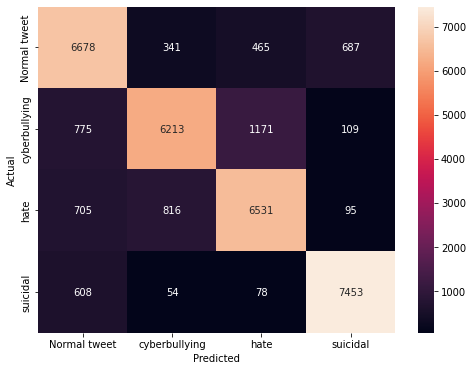

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=category_id_df['type-name'].values, yticklabels=category_id_df['type-name'].values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**More basic KPI's:**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.5f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.5f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall: {:.5f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score: {:.5f}'.format(f1_score(y_test, y_pred, average='weighted')))

Accuracy: 0.81988
Precision: 0.82112
Recall: 0.81988
F1-score: 0.81965
